In [1]:
!pip install mediapipe

from google.colab import drive
drive.mount('/content/drive')
dir = "/content/drive/MyDrive/Colab Notebooks/computer-vision/data/augmentation/bill gates/"

     |████████████████████████████████| 32.2MB 102kB/s 
Mounted at /content/drive


## Albumentation

In [79]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import albumentations as A
import random
import os
import mediapipe as mp
import numpy as np

def show_images(imgs, columns=5):
  plt.figure(figsize=(20,10))
  for i, image in imgs['s'].items():
      plt.subplot(len(imgs['s']) / columns + 1, columns, i + 1)
      plt.imshow(image)
      plt.title(imgs['l'][i], fontsize=12)
  plt.show()

def get_images():
  images = {"s": dict(), "l": dict()}
  for i, img_path in enumerate(glob.glob(dir + '*.jpeg')):
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    height, width = image.shape[:2]
    r = width/250
    image = cv2.resize(image, (round(width / r), round(height / r)))
    images['s'][i] = image
    images['l'][i] = os.path.basename(img_path)
  return images

def show_score(transform=None):
  scores = []
  imgs = get_images()
  if transform is not None:
    for i, img in imgs['s'].items():
      alb = transform(image=img)
      imgs['s'][i] = alb['image']
    random.seed(42)
  mp_face_detection = mp.solutions.face_detection
  with mp_face_detection.FaceDetection(min_detection_confidence=0.5, model_selection=0) as face_detection:
    for i, img in imgs['s'].items():
      results = face_detection.process(img)
      if not results.detections:
        continue
      s = results.detections[0].score[0]
      scores.append(s)
      imgs['l'][i] = imgs['l'][i] + " / " + str(round(s, 3))
  m = np.mean(scores)
  show_images(imgs)
  print("Mean score: ", m)
  return m

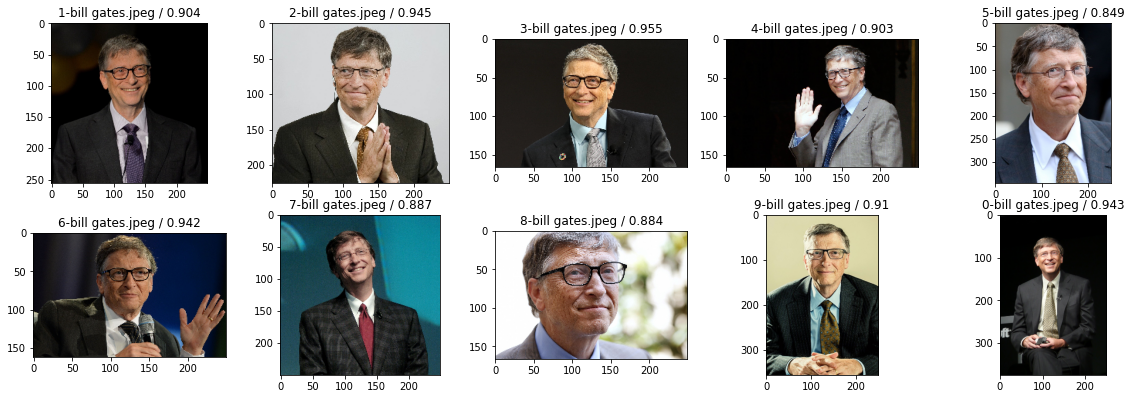

Mean score:  0.9122104525566102


0.9122104525566102

In [80]:
show_score()

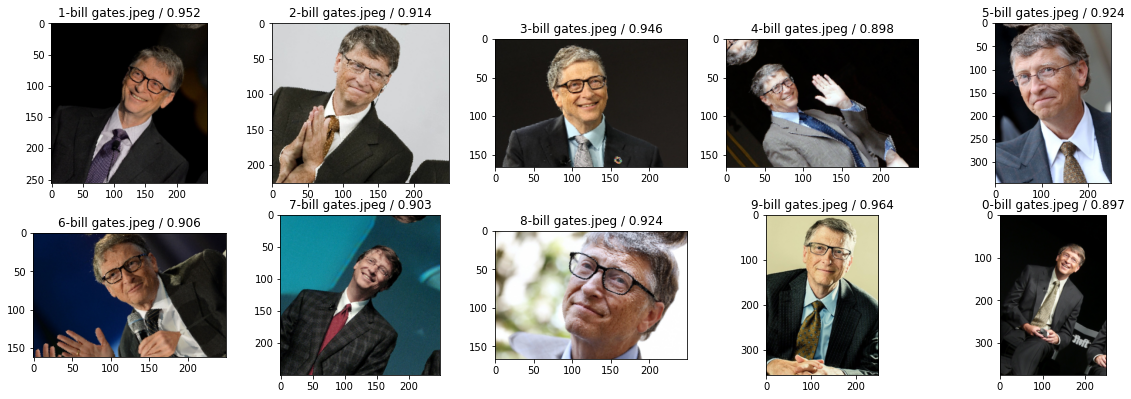

Mean score:  0.9228171348571778


0.9228171348571778

In [81]:
transform = A.Compose(
    [
        A.HorizontalFlip(p=1),
        A.ShiftScaleRotate(p=1),
    ]
)
show_score(transform=transform)

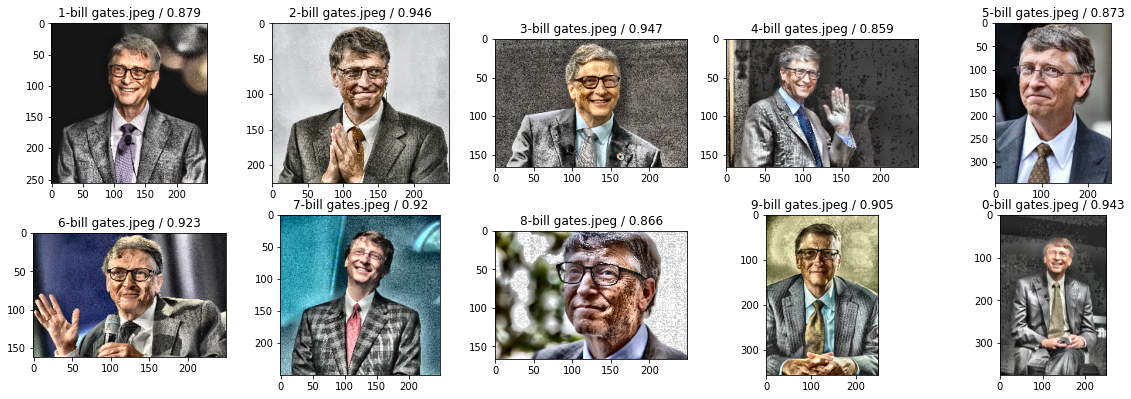

Mean score:  0.9061621069908142


0.9061621069908142

In [82]:
transform = A.Compose(
    [
        A.HorizontalFlip(p=1),
        A.CLAHE(always_apply=False, p=1.0, clip_limit=(1, 70), tile_grid_size=(8, 8)),
    ]
)
show_score(transform=transform)

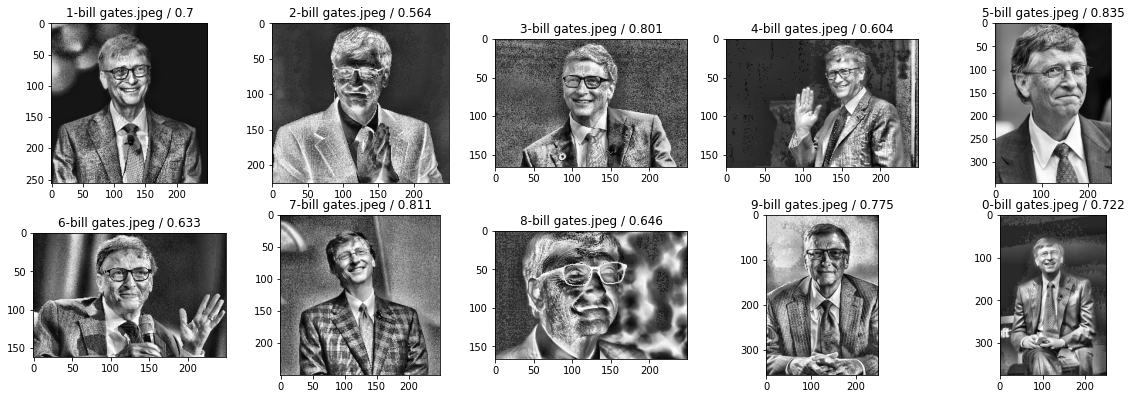

Mean score:  0.709078061580658


0.709078061580658

In [83]:
transform = A.Compose(
    [
        A.ToGray(always_apply=False, p=1.0),
        A.CLAHE(always_apply=False, p=1.0, clip_limit=(1, 70), tile_grid_size=(8, 8)),
    ]
)
show_score(transform=transform)

Degree:  0


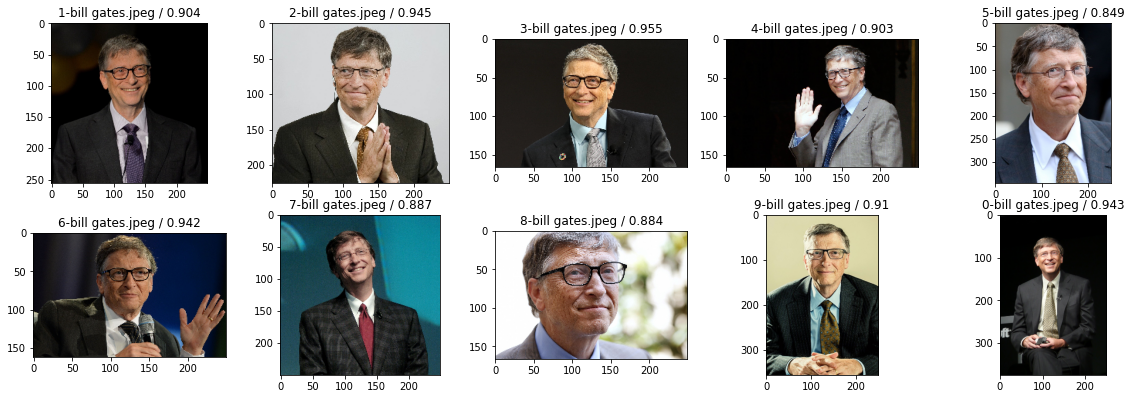

Mean score:  0.9122104525566102
Degree:  10


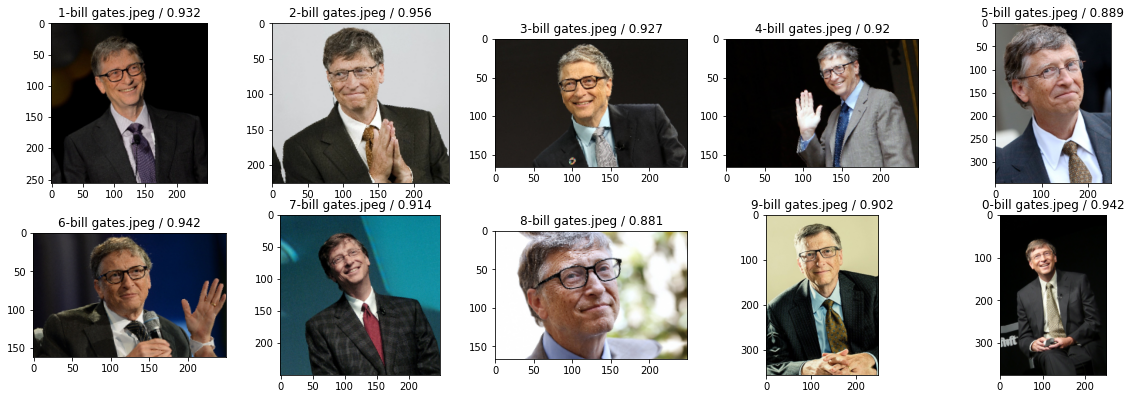

Mean score:  0.9203548610210419
Degree:  20


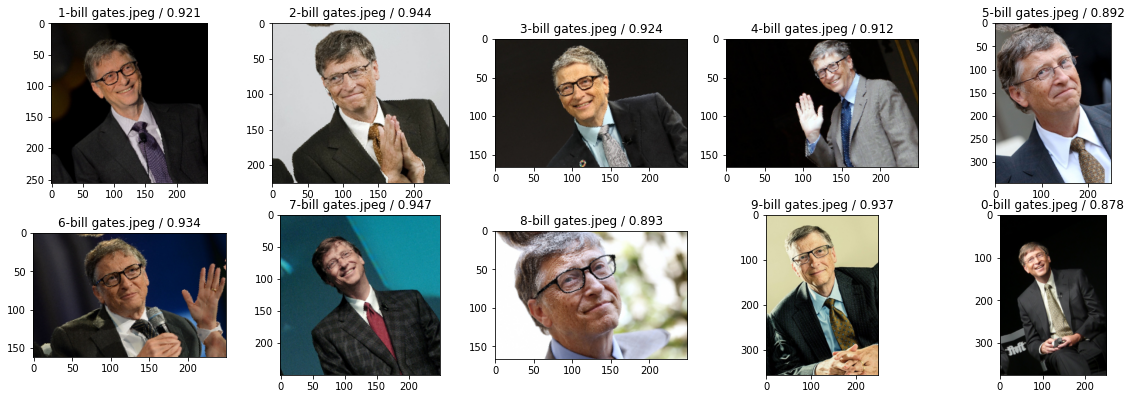

Mean score:  0.9182285368442535
Degree:  30


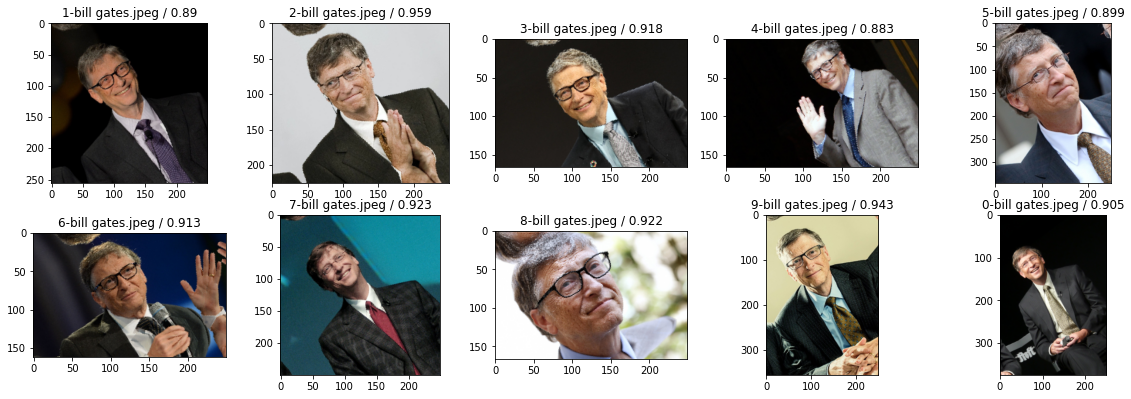

Mean score:  0.9155830264091491
Degree:  40


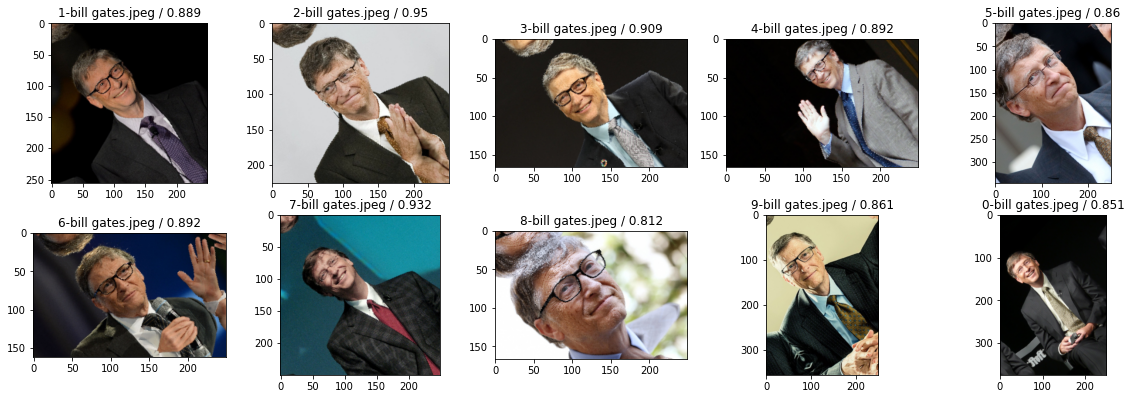

Mean score:  0.884878271818161
Degree:  50


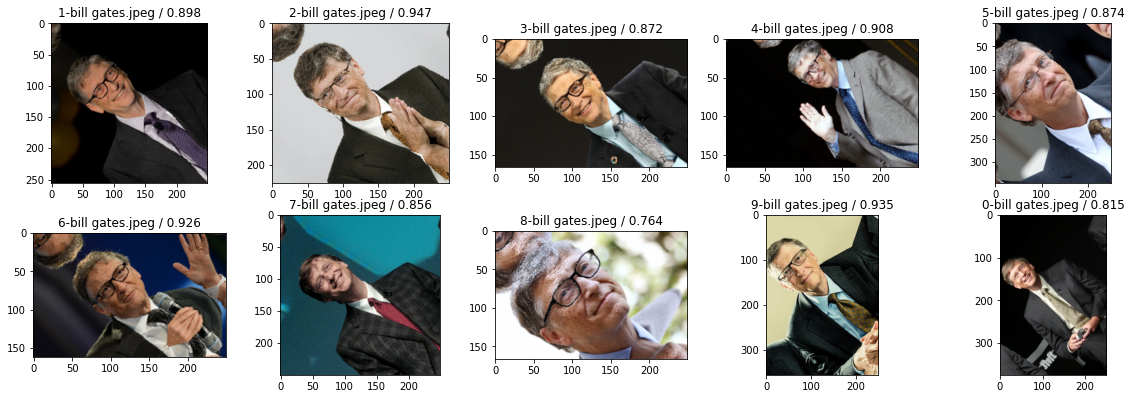

Mean score:  0.8794995784759522
Degree:  60


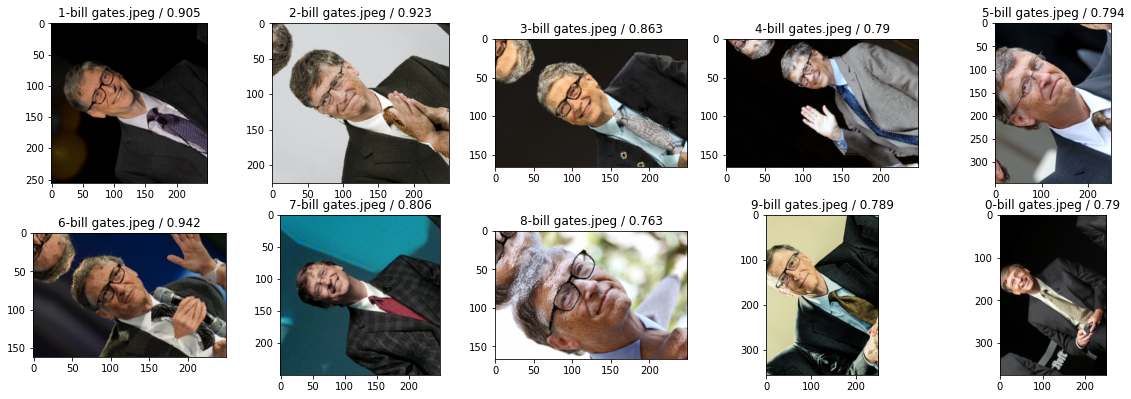

Mean score:  0.8365001142024994
Degree:  70


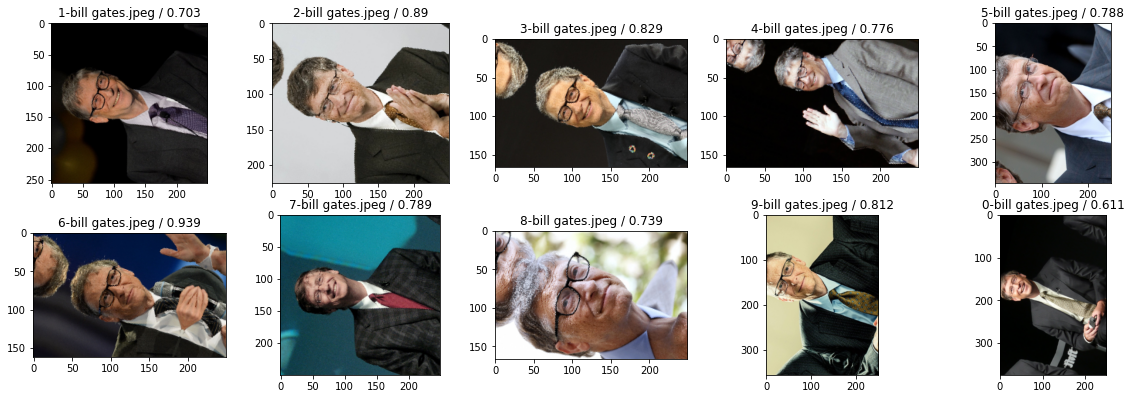

Mean score:  0.7875264167785645
Degree:  80


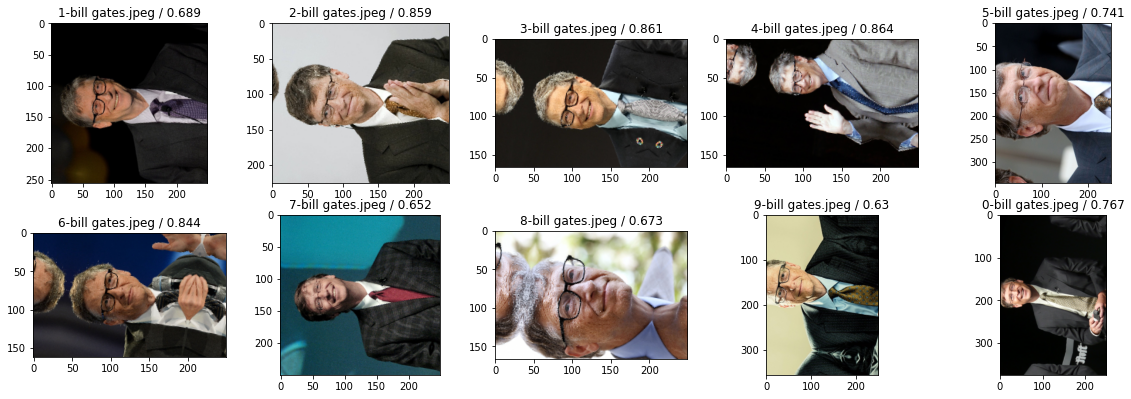

Mean score:  0.75799480676651
Degree:  90


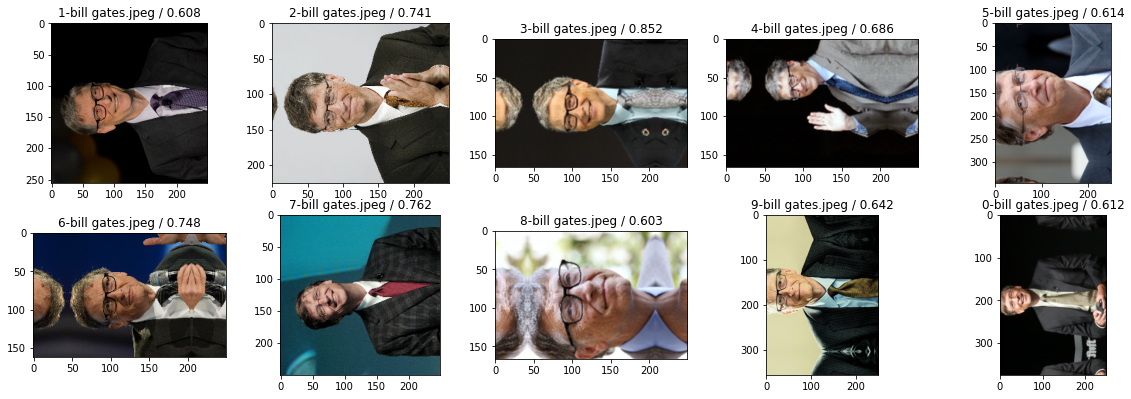

Mean score:  0.6866559565067292


In [84]:
data = []
for d in range(0, 100, 10):
  transform = A.Compose(
    [
        A.Rotate(p=1.0, limit=(d, d)),
    ]
  )
  print("Degree: ", d)
  a = show_score(transform=transform)
  data.append([d, a])

In [85]:
import pandas as pd
df = pd.DataFrame(data, columns=["Degree", "Accuracy"])
df

Degree  Accuracy
0       0  0.912210
1      10  0.920355
2      20  0.918229
3      30  0.915583
4      40  0.884878
5      50  0.879500
6      60  0.836500
7      70  0.787526
8      80  0.757995
9      90  0.686656

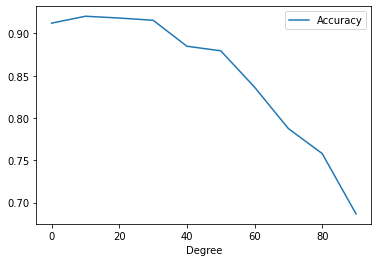

In [86]:
df.plot(x="Degree")